# Podstawy sieci neuronowych, wykłady 11-

# Wojciech Broniowski

## Instytut Fizyki, Uniwersytet Jana Kochanowskiego w Kielcach

# Inżynieria danych 2019/20

## Instytut Fizyki, Uniwersytet Jana Kochanowskiego w Kielcach


## Wersja z 12.05.2020

Link do vidyo: https://vidyoportal.cern.ch/join/o5nBkbwSf9

# Importowane pakiety


In [1]:
import math  as m
import numpy as np

# liczby losowe
import random

# grafika do wykresów
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as patches

# działania na łańcuchach znaków
import string

# statystyka
import statistics as st

# pomar czasu
import time

# dopasowywanie krzywych do danych
from scipy.optimize import curve_fit

# wyświetlanie importowanej grafiki
from IPython.display import display, Image

# wykresy konturowe
import matplotlib.cm as cm

# dla wykresów trzywymiarowych
from mpl_toolkits.mplot3d.axes3d import Axes3D


# Wykład 11 - Sieci Hopfielda

Dotychczas rozważaliśmy sieci neuronowe z propagacją sygnału do przodu. Obecnie zajmiemy się sieciami ze sprzężeniem zwrotnym, tj. sygnał może się wracać do poprzednich warstw lub propagować się "równolegle" międzt neuronami w tej samej warstwie. 

## Złudzenie Macha

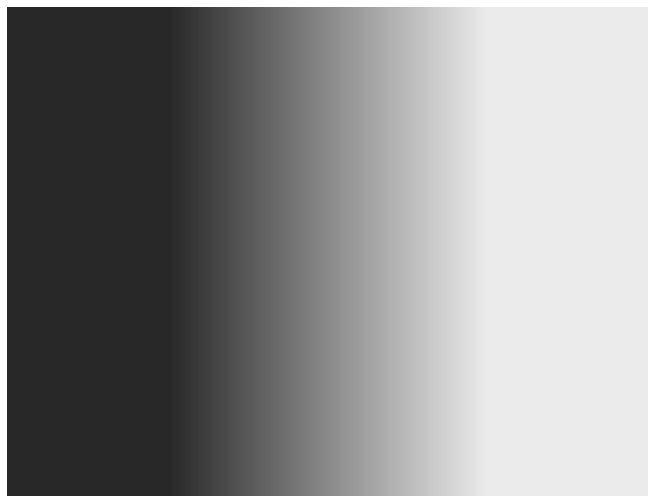

In [2]:
v0=[40 for i in range(0,99)]
v1=[i for i in range(40,235)]
v2=[235 for i in range(0,99)]

v=v0+v1+v2

H = np.array([v for i in range(0,300)])

plt.figure(figsize=(13,9))
plt.imshow(H,cmap='gray', vmin=0, vmax=255)
plt.axis("off");


Natomiast wykres intensywności "obiektywnej" jest następujący:

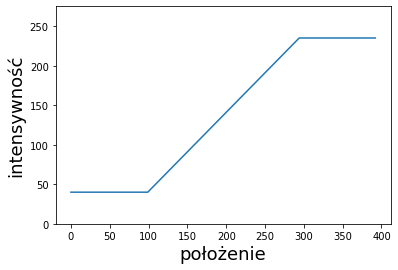

In [3]:
plt.plot(v)
plt.ylim(0,275)
plt.xlabel('położenie',fontsize=18)
plt.ylabel('intensywność',fontsize=18);

## Złudzenie Hermanna

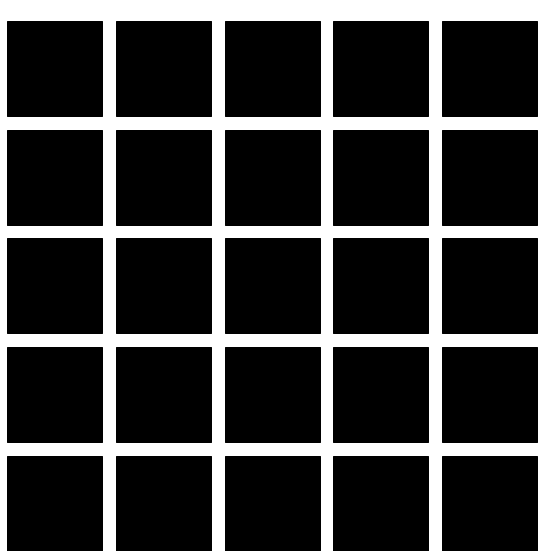

In [4]:
fig1 = plt.figure(figsize=(10,10))
b=3.5
ax1 = fig1.add_subplot(111, aspect='equal')
for i in [0,4,8,12,16]:
    for j in [0,4,8,12,16]:
        ax1.add_patch(patches.Rectangle((i,j), b, b, color='black'))

plt.ylim(0,20)
plt.xlim(0,20)
plt.axis("off");

Nasz kuzyn **krab podkowiasty** pozwoli nam zrozumieć podstawowy mechanizm stojący za tymi złudzeniami!

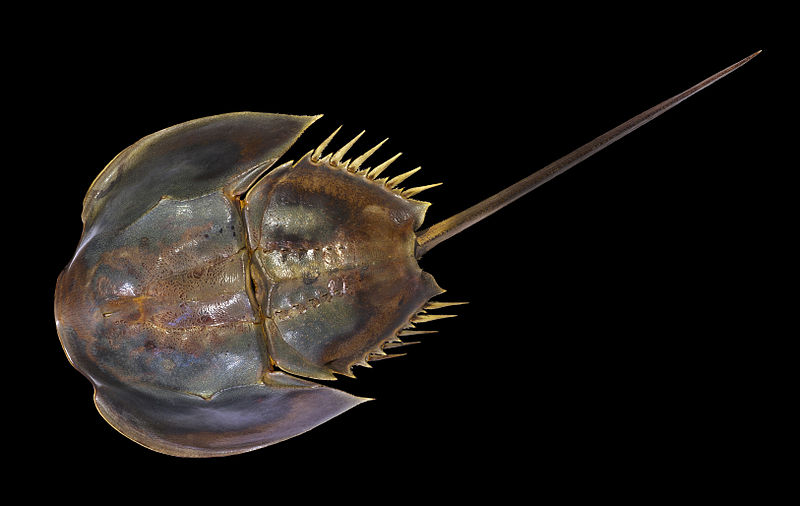

In [5]:
Image(filename="images/Limule.jpg",width=320)

Haldan Keffer Hartline (December 22, 1903 - March 17, 1983) was an American physiologist who was a cowinner (with George Wald and Ragnar Granit) of the 1967 Nobel Prize in Physiology or Medicine for his work in analyzing the neurophysiological mechanisms of vision. Hartline investigated the electrical responses of the retinas of certain arthropods, vertebrates, and mollusks because their visual systems are much simpler than those of humans and are thus easier to study. He concentrated his studies on the eye of the horseshoe crab (Limulus polyphemus). Using minute electrodes in his experiments, he obtained the first record of the electrical impulses sent by a single optic nerve fibre when the receptors connected to it are stimulated by light. He found that the photoreceptor cells in the eye are interconnected in such a way that when one is stimulated, others nearby are depressed, thus enhancing the contrast in light patterns and sharpening the perception of shapes. Hartline thus built up a detailed understanding of the workings of individual photoreceptors and nerve fibres in the retina, and he showed how simple retinal mechanisms constitute vital steps in the integration of visual information [Wikipedia].

## Sieć Hopfielda

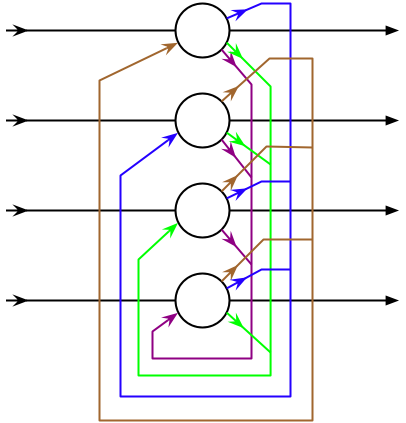

In [6]:
Image(filename="images/Hopfield-net.png",width=250)

Model ze sprzężeniem zwrotnym dla N neuronów z tej samej warstwy (neurony w tej samej warstwie "rozmawiają ze sobą"). W kolejnych iteracjach sygnał wchodzący do neuronów wynosi (w notacji wektorowej)

$f_{j+1}=f_{j}+\varepsilon (s - W f_{j}-f_{j})$,

gdzie 

$s=(s_1,s_2,...,s_N)$ - zewnętrzny sygnał wejściowy

$f_j = (f_{j,1},f_{j,2},...,f_{j,N})$ - całkowity sygnał w iteracji $j$

$W$ - macierz sprzężenia (tłumienia) między neuronami (symetryczna, $N \times N$)

$\varepsilon$ - parametr sprzężenia

Sygnał w kolejnych iteracjach:

In [7]:
ns = 3*10;     # liczba neuronów N
b = 6;         # parametr spadku tłumienia z odległoscią neuronów
a = 0.2;       # wielkość tłumienia
iter = 20;     # liczba iteracji 
eps = .1;      # parametr sprzężenia

Przykładowy sygnał - paradoks Macha

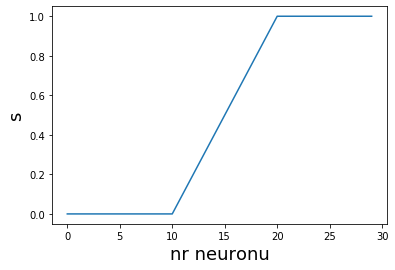

In [8]:
s=[0 for i in range(0,ns//3)]+[3*i/ns for i in range(0,ns//3)]+[1 for i in range(0,ns//3)]

figs=plt.figure()
plt.plot(s)
plt.xlabel('nr neuronu',fontsize=18)
plt.ylabel('s',fontsize=18);

## Tłumienie poboczne

Macierz sprzężenia (tłumienia):

Przyjmiemy przykładowo 

$W_{ii}=0$,

$W_{ij}=-a \exp(-|i-j|/b)~~$ dla $i \neq j$, $~~a,b>0$,

tj. tłumienie jest najsilniejsze dla bliskich sasiadów i spada z odległością z charakterystyczna skalą b.

In [9]:
W=np.array([[-a*np.exp(-np.abs(i-j)/b) for i in range(ns)] for j in range(ns)]) # spadek wykładniczy
for i in range(ns):
    W[i][i]=0       # brak tłumienia samego siebie

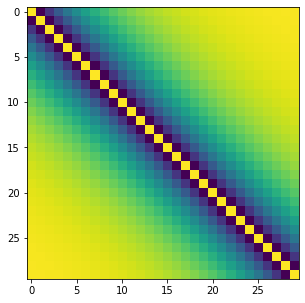

In [10]:
plt.figure(figsize=(5,5))
plt.imshow(W)
# plt.axis("off");

Tłumienie jest najsilniejsze w ciemnoniebieskich obszarach, w żółtych brak tłumienia.

### Iteracja wg powyższych wzorów

Text(0, 0.5, 'f')

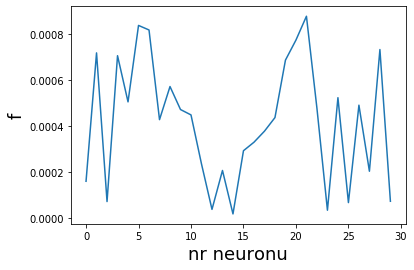

In [11]:
f = [.001*random.random() for _ in range(ns)]; # początkowy sygnał wyściowy bliski 0
plt.plot(f)
plt.xlabel('nr neuronu',fontsize=18)
plt.ylabel('f',fontsize=18)

In [12]:
def it(f):
    f+= eps*(s + np.dot(W,f) - f)
    return f

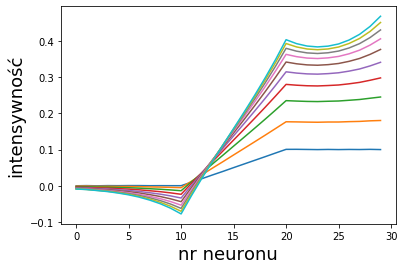

In [13]:
for k in range(10):
    f=it(f)
    plt.plot(f)
    plt.xlabel('nr neuronu',fontsize=18)
    plt.ylabel('intensywność',fontsize=18)

Pojawiają się "dzióbki" w miejscach, gdzie początkowy sygnał $s$ (zob. poniżej) się zmieniał. Jest to wynik sprzężenia (tłumienia) sąsiednich neuronów. 

Widać, że w modelu oka kraba podkowiastego płaskie fragmenty sygnału wejściowego $s$ są odwzorowywane ze znacznym zniekształceniem. Jakościowo odpowiada to złudzeniu Macha. W szczególności, dla $i=10$ mamy minimum (najjaśniejszy "pasek"), a dla $i=20$ (lokalne) maksimum (ciemny pasek). Tak więc przedstawiony prosty model ujemnego sprzężenia zwrotnego między receptorami siatkówki wystarcza do jakościowego wyjaśnienia zjawiska.

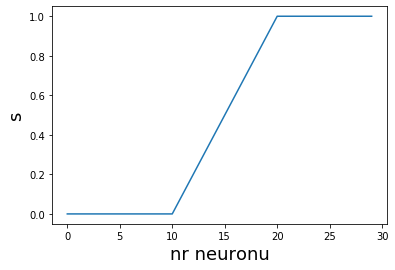

In [14]:
figs

Dla stanu ustalonego (tj. po wielu iteracjach) sygnał wyjściowy sie nie zmienia, czyli mamy $f_{j+1}=f_j=f$, zatem
 
$s+W f - f=0$,

$s+(W-1) f=0$,

$(1-W) f=s$,

co możemy rozwiązać dla $f$:

$f=(1-W)^{-1} s$.     


In [15]:
np.identity(ns)-W  # 1-W

array([[1.        , 0.16929634, 0.14330626, 0.12130613, 0.10268342,
        0.08691964, 0.07357589, 0.06228064, 0.05271943, 0.04462603,
        0.03777512, 0.03197595, 0.02706706, 0.02291177, 0.01939439,
        0.016417  , 0.01389669, 0.01176329, 0.00995741, 0.00842877,
        0.0071348 , 0.00603948, 0.00511231, 0.00432747, 0.00366313,
        0.00310077, 0.00262475, 0.0022218 , 0.00188071, 0.00159199],
       [0.16929634, 1.        , 0.16929634, 0.14330626, 0.12130613,
        0.10268342, 0.08691964, 0.07357589, 0.06228064, 0.05271943,
        0.04462603, 0.03777512, 0.03197595, 0.02706706, 0.02291177,
        0.01939439, 0.016417  , 0.01389669, 0.01176329, 0.00995741,
        0.00842877, 0.0071348 , 0.00603948, 0.00511231, 0.00432747,
        0.00366313, 0.00310077, 0.00262475, 0.0022218 , 0.00188071],
       [0.14330626, 0.16929634, 1.        , 0.16929634, 0.14330626,
        0.12130613, 0.10268342, 0.08691964, 0.07357589, 0.06228064,
        0.05271943, 0.04462603, 0.03777512, 0.

In [16]:
np.linalg.inv(np.identity(ns)-W)  # macierz odwrotna

array([[ 1.05901048e+00, -1.36967451e-01, -9.82257162e-02,
        -7.04422203e-02, -5.05173860e-02, -3.62283626e-02,
        -2.59810410e-02, -1.86322113e-02, -1.33620248e-02,
        -9.58253001e-03, -6.87207959e-03, -4.92829081e-03,
        -3.53431107e-03, -2.53462547e-03, -1.81770727e-03,
        -1.30357578e-03, -9.34873573e-04, -6.70467550e-04,
        -4.80860100e-04, -3.44898272e-04, -2.47413921e-04,
        -1.77531514e-04, -1.27454843e-04, -9.15972663e-05,
        -6.59584460e-05, -4.76780693e-05, -3.47167442e-05,
        -2.56284820e-05, -1.93993797e-05, -1.53345072e-05],
       [-1.36967451e-01,  1.07672521e+00, -1.24263397e-01,
        -8.91150500e-02, -6.39085389e-02, -4.58317801e-02,
        -3.28680975e-02, -2.35712394e-02, -1.69040315e-02,
        -1.21226679e-02, -8.69373103e-03, -6.23468255e-03,
        -4.47118655e-03, -3.20650420e-03, -2.29954527e-03,
        -1.64912776e-03, -1.18268994e-03, -8.48195145e-04,
        -6.08326536e-04, -4.36323936e-04, -3.12998424e-

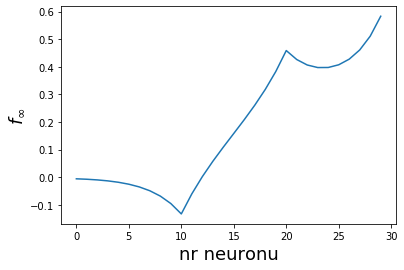

In [17]:
finf=np.dot(np.linalg.inv(np.identity(ns)-W),s)

plt.plot(finf)
plt.xlabel('nr neuronu',fontsize=18)
plt.ylabel('$f_\infty$',fontsize=18);

Po co Natura zadaje sobie tyle trudu, a przy okazji zmysły nas "oszukują? Jest tak, ponieważ ten sam mechanizm przetwarzania obrazu prowadzi do zwiększenia kontrastu/ostrości widzenia.

### Inny przykładowy sygnał

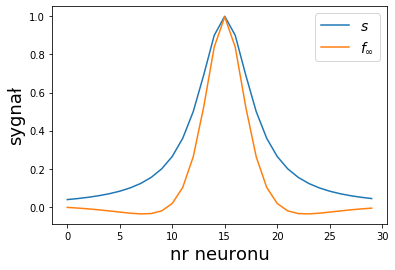

In [18]:
s2 = np.array([3**2/((i - ns/2)**2 + 3**2) for i in range(ns)])

finf2=np.dot(np.linalg.inv(np.identity(ns)-W),s2)
plt.plot(s2)
plt.plot(1.5*finf2)
plt.legend(('$s$','$f_\infty$'),fontsize=14)
plt.xlabel('nr neuronu',fontsize=18)
plt.ylabel('sygnał',fontsize=18);

Uzyskany sygnał (linia żółta) jest węższy od oryginału (linia niebieska), sieć dokonała więc użytecznej korekcji/wyostrzenia obrazu. Kosztem tej korzystnej cechy jest pojawienie się złudzenia, które jest ewidentnie "przekłamaniem".


# Wyjaśnienie złudzenia Hermanna
## w oparciu o tłumienie poboczne

http://www.yorku.ca/eye/hermann1.htm

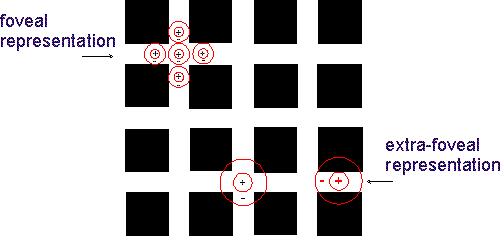

In [19]:
Image(filename="images/hermann1.gif",width=400)

*foveal* - dołek środkowy siatkówki oka

To understand the receptive field explanation for the Hermann grid illusion requires a basic understanding of receptive fields.

Once again, it is a matter of lateral inhibition between the center and surround of the receptive field. Note the lower right part of the diagram. The receptive field that lies at the intersection of the white cross has more light falling on its inhibitory surround than does the receptive field that lies between the two black squares. Consequently, the excitatory center of this receptive field between the squares yields a stronger response than that which lies at the intersection of the white cross. This explanation is appropriate for those circumstances where the receptive fields are larger than the spaces between the squares.

Receptive fields in the central fovea are much smaller than in the rest of the retina. This is represented in the upper right of the diagram. In the Hermann grid you probably did not see a dark area when you looked directly at the intersection of the white cross, but did see dark areas in your peripheral vision. To prove to yourself that this is not some trick, just get up and walk away from your computer screen. When you are at some distance from it, you will undoubtedly notice that the dark blob is visible even at your fixation point. I leave it to you to figure out why this happens. 

# Inne złudzenia

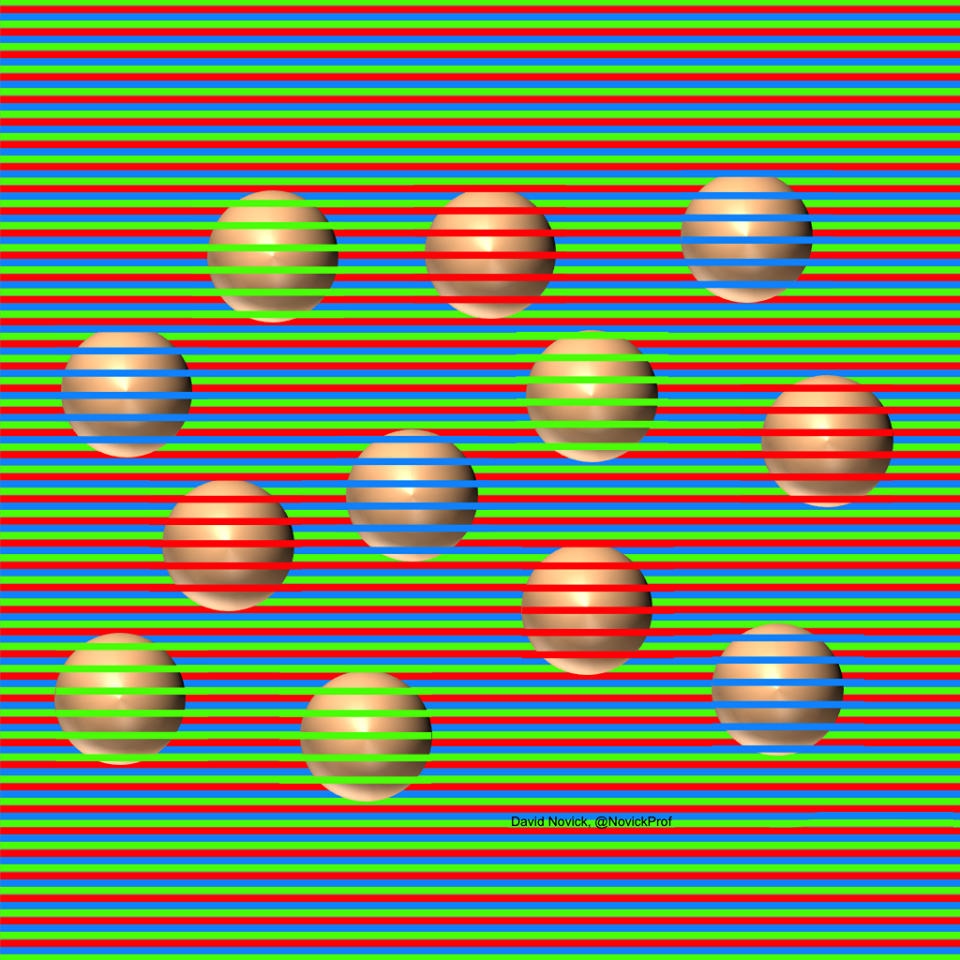

In [20]:
Image(filename="images/balls.png",width=500)

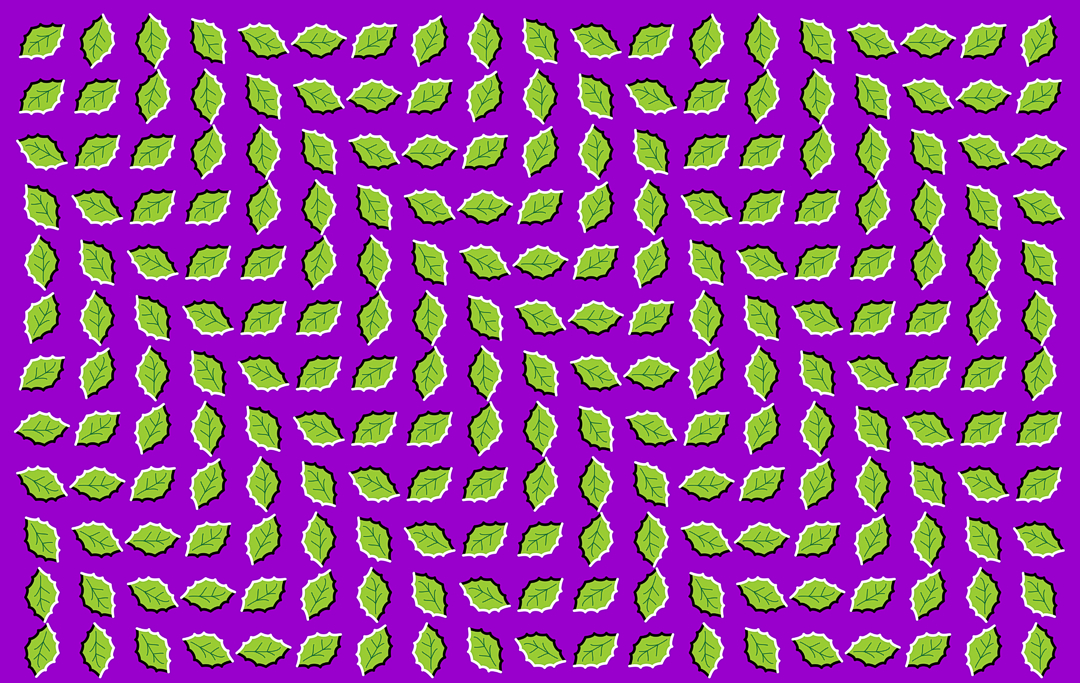

In [21]:
Image(filename="images/leafwave.jpg",width=750)

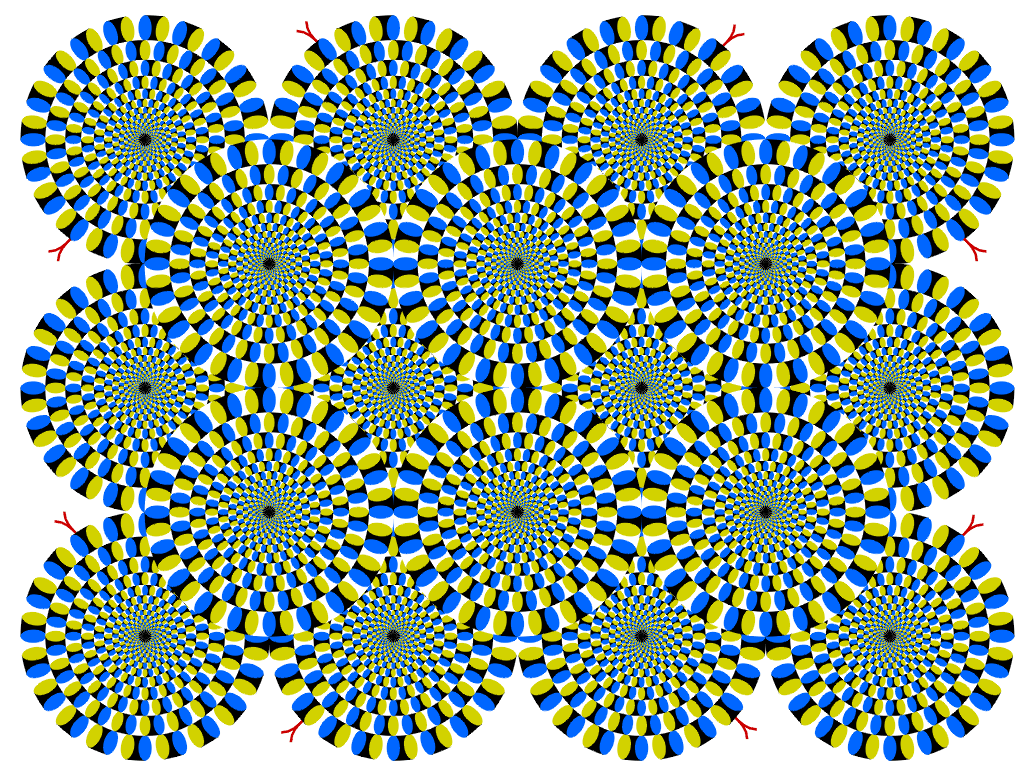

In [22]:
Image(filename="images/rotsnake.gif",width=750)

## Rozumienie mózgu poprzez analizę złudzeń!

https://www.pcmag.com/news/21-optical-illusions-that-prove-your-brain-sucks

https://michaelbach.de/ot/